# SLR-Session 2 Classification -Solutions

### Question 1 

In [1]:
#importing libraries
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization
library(pROC)        # AUC, ROC
library(e1071)       # Evaluation
library(gridExtra)   # Visualization
library(kknn)        # kNN model
library(nnet)        # One-vs-All Logistic Regression
library(dummies)     # Data processing

# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)

Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:mlr':

    train


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var



Attaching package: 'e1071'


The following object is masked from 'package:mlr':

    impute



Attaching package: 'kknn'


The following object is masked from 'package:caret':

    contr.dummy


dummies-1.5.6 provided by Decision Patterns




### Solution :(a)

In [2]:
#Given : X1  = hours studied, X2 = undergrad GPA, Y = Receive an A,βˆ0 = −6, βˆ1 = 0.05, βˆ2 = 1
# X1= 40, X2 = 3.5
P <- function(X1,X2) {
    z <- exp(-6 + 0.05*X1 + 1*X2);
    return ( round(z/(1+z),3))
}
P(40,3.5)

[1] 0.378

### Solution :(b)

In [3]:
#Find X1 for P=0.5
H <- seq(40,55,1)
Prob <- sapply(H,3.5,FUN=P)
names(Prob) <- paste0(H,"h")
Prob 

40h   41h   42h   43h   44h   45h   46h   47h   48h   49h   50h   51h   52h 
0.378 0.389 0.401 0.413 0.426 0.438 0.450 0.463 0.475 0.488 0.500 0.512 0.525 
  53h   54h   55h 
0.537 0.550 0.562

Student need to study 50 hours to have a 50% chance of getting an A in the class

### Question 2

### Solution 

Logistic Regression.If we use KNN with K=1, There will not be any training error (zero) and it will be classified correctly. Hence for the KNN with average error rate of 18%, the test error rate is 36% .So, the logistic regression with test error rate 30% will be better for classification when compared to KNN

### Question 3

### Solution : (a)

In [4]:
#P(X)=exp(βˆ0+ βˆ1*X1 + βˆ2*X2+...) /(1+exp(βˆ0+ βˆ1*X1 + βˆ2*X2+...)) 
#odds = P/1-P = 0.37
print( 0.37/(1+0.37))

[1] 0.270073


27% of people with an odds of 0.37 of defaulting on their credit card payment will in fact default

### Solution : (b)

In [5]:
#Given : P = 0.16
#odds = P/1-P
print(0.16/(1-0.16))

[1] 0.1904762


odds of 0.19 that she will default

### Question 4

### Solution : (a)

In [6]:
# Input data
library(ISLR)

head(Weekly)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
4,1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
5,1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
6,1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


In [7]:
# Show variables description
help(Weekly)

In [8]:
str(Weekly)

'data.frame':	1089 obs. of  9 variables:
 $ Year     : num  1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 ...
 $ Lag1     : num  0.816 -0.27 -2.576 3.514 0.712 ...
 $ Lag2     : num  1.572 0.816 -0.27 -2.576 3.514 ...
 $ Lag3     : num  -3.936 1.572 0.816 -0.27 -2.576 ...
 $ Lag4     : num  -0.229 -3.936 1.572 0.816 -0.27 ...
 $ Lag5     : num  -3.484 -0.229 -3.936 1.572 0.816 ...
 $ Volume   : num  0.155 0.149 0.16 0.162 0.154 ...
 $ Today    : num  -0.27 -2.576 3.514 0.712 1.178 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 1 1 2 2 2 1 2 2 2 1 ...


In [9]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

In [10]:
W1 <- Weekly[-9]
W1 <- cor(W1)
corrplot(W1,method = 'number')
W1


ERROR: Error in corrplot(W1, method = "number"): could not find function "corrplot"


From the plot,we can see that Volume and Year are the only variables with  the strong correlation rest all lag variables have a weak correlation with the Today's returns 

### Solution : (b)

In [11]:
#Fit the Logistic regression model with full dataset
wk_logreg = glm(Direction ~ . - Year - Today, data = Weekly, family = "binomial")
summary(wk_logreg)


Call:
glm(formula = Direction ~ . - Year - Today, family = "binomial", 
    data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


Lag2 is the the only statistically significant predictor with a p-value of 0.0296 (at 5% level of significance).Hence it rejects the null hypothesis and accept the alternate hypothesis i.e Lag2 predictor is related to the response-Direction 

### Solution : (c)

In [12]:
# Make prediction
pred_wk_prob <- predict(wk_logreg,type='response')
head(pred_wk_prob)

1         2         3         4         5         6 
0.6086249 0.6010314 0.5875699 0.4816416 0.6169013 0.5684190

In [13]:
# Compute the confusion matrix
threshold <- 0.5  # Decision threshold
wk_pred <- rep('Down', length(pred_wk_prob))
wk_pred[pred_wk_prob > threshold] <- 'Up'

# Confusion matrix
print('Confusion matrix:')
table(wk_pred, Weekly$Direction)

[1] "Confusion matrix:"


       
wk_pred Down  Up
   Down   54  48
   Up    430 557

In [14]:
#overall fraction of correct predictions
mean(wk_pred == Weekly$Direction)

[1] 0.5610652

Overall 56.1% of responses are predicted correctly.but the Training error rate = 478/1089 = 43.89% .Only 54 out of 484 down weeks accurately predicted but 
557 out of 605 of up weeks are predicted.So,the Predictions are correct only 11% of market down weeks and 92% of market up weeks. 

### Solution : (d)

In [15]:
# Separate data to train and test
stock_train <- Weekly[Weekly$Year < 2009, ] #985 obs
stock_test <- Weekly[Weekly$Year >= 2009, ] #104 obs

In [16]:
str(stock_test)

'data.frame':	104 obs. of  9 variables:
 $ Year     : num  2009 2009 2009 2009 2009 ...
 $ Lag1     : num  6.76 -4.45 -4.52 -2.14 -0.73 ...
 $ Lag2     : num  -1.7 6.76 -4.45 -4.52 -2.14 ...
 $ Lag3     : num  0.926 -1.698 6.76 -4.448 -4.518 ...
 $ Lag4     : num  0.418 0.926 -1.698 6.76 -4.448 ...
 $ Lag5     : num  -2.251 0.418 0.926 -1.698 6.76 ...
 $ Volume   : num  3.79 5.04 5.95 6.13 5.6 ...
 $ Today    : num  -4.45 -4.52 -2.14 -0.73 5.17 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 1 1 1 1 2 1 1 1 1 2 ...


In [17]:
# Fit Logistic Regression model
wk_logreg <- glm(Direction ∼  Lag2,
                 data=stock_train, family=binomial)
summary(wk_logreg)


Call:
glm(formula = Direction ~ Lag2, family = binomial, data = stock_train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


In [18]:
# Make prediction on both train and test data
pred_train_prob <- predict(wk_logreg, newdata=stock_train, type='response')
head(pred_train_prob)

pred_test_prob <- predict(wk_logreg, newdata=stock_test, type='response')
head(pred_test_prob)

1         2         3         4         5         6 
0.5731178 0.5623397 0.5467559 0.5133978 0.6004653 0.5608522

986       987       988       989       990       991 
0.5261291 0.6447364 0.4862159 0.4852001 0.5197667 0.5401255

In [19]:
# Evaluation model on test
threshold <- 0.5  # Decision threshold
pred_test <- rep('Down', length(pred_test_prob))
pred_test[pred_test_prob > threshold] <- 'Up'

# Confusion matrix
print('Confusion matrix:')
table(pred_test, stock_test$Direction)

[1] "Confusion matrix:"


         
pred_test Down Up
     Down    9  5
     Up     34 56

In [20]:
#Accuracy-Overall fraction of correct predictions
acc <- mean(pred_test == stock_test$Direction)
print(paste('Accuracy =', round(acc, 2), '%'))

[1] "Accuracy = 0.62 %"


The overall fractions of correct predictions of the test data is 62%

### Solution : (e)

###  Linear Discriminant Analysis (LDA)

In [21]:

# Fit the LDA model with Lag2 predictor from LogRes model
library(MASS)
wk_lda <- lda(Direction ~ Lag2, data=stock_train)
summary(wk_lda)
wk_lda

        Length Class  Mode     
prior   2      -none- numeric  
counts  2      -none- numeric  
means   2      -none- numeric  
scaling 1      -none- numeric  
lev     2      -none- character
svd     1      -none- numeric  
N       1      -none- numeric  
call    3      -none- call     
terms   3      terms  call     
xlevels 0      -none- list     

Call:
lda(Direction ~ Lag2, data = stock_train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

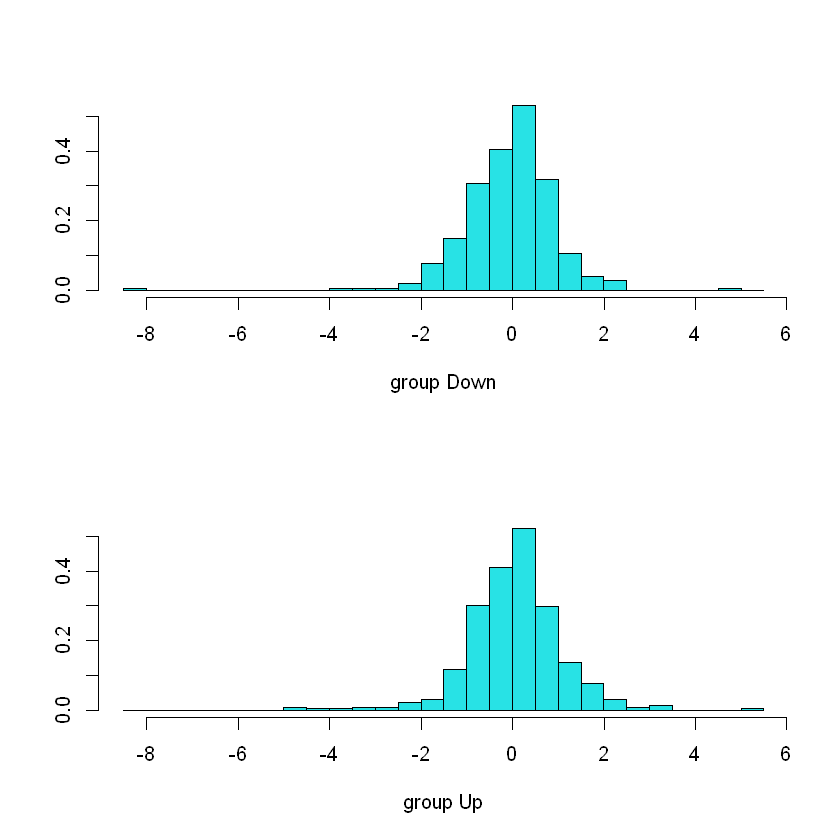

In [22]:
# options(repr.plot.width=4, repr.plot.height=8)
plot(wk_lda)

In [23]:
# Predict and evaluate on test data
lda_pred <- predict(wk_lda, newdata=stock_test)
head(lda_pred$class)
head(lda_pred$posterior)

# Confusion matrix
print('Confusion matrix:')
table(lda_pred$class, stock_test$Direction)

# Accuracy
acc <- mean(lda_pred$class == stock_test$Direction)
print(paste('Accuracy =', round(acc, 2), '%'))

[1] Up   Up   Down Down Up   Up  
Levels: Down Up

,Down,Up
986,0.4736555,0.5263445
987,0.3558617,0.6441383
988,0.5132860,0.4867140
989,0.5142948,0.4857052
990,0.4799727,0.5200273
991,0.4597586,0.5402414


[1] "Confusion matrix:"


      
       Down Up
  Down    9  5
  Up     34 56

[1] "Accuracy = 0.62 %"


We get the same Accuracy for LDA model

### Solution : (f)

### QDA

In [24]:
# Fit the QDA model on train set with Lag2 predictor
wk_qda <- qda(Direction ~ Lag2, data=stock_train)
wk_qda

Call:
qda(Direction ~ Lag2, data = stock_train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

In [25]:
# Predict and evaluate on test data
qda_pred <- predict(wk_qda, newdata=stock_test)
head(qda_pred$class)
head(qda_pred$posterior)

# Confusion matrix
print('Confusion matrix:')
table(qda_pred$class, stock_test$Direction)

# Accuracy
acc <- mean(qda_pred$class == stock_test$Direction)
print(paste('Accuracy =', round(acc, 2), '%'))

[1] Up Up Up Up Up Up
Levels: Down Up

,Down,Up
986,0.4784630,0.5215370
987,0.2693952,0.7306048
988,0.4735416,0.5264584
989,0.4729118,0.5270882
990,0.4802735,0.5197265
991,0.4709913,0.5290087


[1] "Confusion matrix:"


      
       Down Up
  Down    0  0
  Up     43 61

[1] "Accuracy = 0.59 %"


Here,The overall fractions of correct predictions of the test data is 59% which is lesser than the Logistic regression model and LDA model

### Solution : (g)

### K-Nearest Neighbors (KNN)

In [26]:
# Fit the KNN model with the train set using Lag2 predictors
library(class)

# k = 1
set.seed(123)
knn1_pred <- knn(train=stock_train["Lag2"],
                 test=stock_test["Lag2"],
                 cl=stock_train$Direction,
                 k=1)

# Confusion matrix
print('Confusion matrix:')
table(knn1_pred, stock_test$Direction)

# Accuracy
acc <- mean(knn1_pred == stock_test$Direction)
print(paste('Accuracy =', round(acc, 2), '%'))

[1] "Confusion matrix:"


         
knn1_pred Down Up
     Down   21 29
     Up     22 32

[1] "Accuracy = 0.51 %"


For KNN model,The overall fractions of correct predictions of the test data is 59% 

### Solution : (h)

Logistic Regression and Linear Discriminant Analysis models appears to provide best results on this data .i.e 62% accuracy

### Solution : (i)

### Logistic Regression

In [27]:
# Fit Logistic Regression model
wk_logreg <- glm(Direction ∼ Lag1 + Lag2 +Lag3,
                 data=stock_train, family=binomial)
summary(wk_logreg)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3, family = binomial, 
    data = stock_train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.638  -1.255   1.000   1.088   1.510  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.212334   0.064698   3.282  0.00103 **
Lag1        -0.053680   0.028924  -1.856  0.06347 . 
Lag2         0.053092   0.029128   1.823  0.06834 . 
Lag3        -0.008887   0.028830  -0.308  0.75788   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1346.9  on 981  degrees of freedom
AIC: 1354.9

Number of Fisher Scoring iterations: 4


In [28]:
#Make predictions
pred_test_prob <- predict(wk_logreg, newdata=stock_test, type='response')
head(pred_test_prob)

986       987       988       989       990       991 
0.4380894 0.6953166 0.5395736 0.5316345 0.5444361 0.4787340

In [29]:
# Evaluation model on test
threshold <- 0.5  # Decision threshold
pred_test <- rep('Down', length(pred_test_prob))
pred_test[pred_test_prob > threshold] <- 'Up'

# Confusion matrix
print('Confusion matrix:')
table(pred_test, stock_test$Direction)

[1] "Confusion matrix:"


         
pred_test Down Up
     Down    8  9
     Up     35 52

In [30]:
#Accuracy-Overall fraction of correct predictions
acc <- mean(pred_test == stock_test$Direction)
print(paste('Accuracy =', round(acc, 2), '%'))

[1] "Accuracy = 0.58 %"


### LDA 

In [31]:
# Fit the LDA model with Lag1,Lag2 and Lag3 predictor from LogRes model
library(MASS)
wk_lda <- lda(Direction ~ Lag1 + Lag2 +Lag3, data=stock_train)
summary(wk_lda)
wk_lda

        Length Class  Mode     
prior   2      -none- numeric  
counts  2      -none- numeric  
means   6      -none- numeric  
scaling 3      -none- numeric  
lev     2      -none- character
svd     1      -none- numeric  
N       1      -none- numeric  
call    3      -none- call     
terms   3      terms  call     
xlevels 0      -none- list     

Call:
lda(Direction ~ Lag1 + Lag2 + Lag3, data = stock_train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
             Lag1        Lag2       Lag3
Down  0.289444444 -0.03568254 0.17080045
Up   -0.009213235  0.26036581 0.08404044

Coefficients of linear discriminants:
             LD1
Lag1 -0.29658609
Lag2  0.29258490
Lag3 -0.04766747

In [32]:
# Predict and evaluate on test data
lda_pred <- predict(wk_lda, newdata=stock_test)
head(lda_pred$class)
head(lda_pred$posterior)

# Confusion matrix
print('Confusion matrix:')
table(lda_pred$class, stock_test$Direction)

# Accuracy
acc <- mean(lda_pred$class == stock_test$Direction)
print(paste('Accuracy =', round(acc, 2), '%'))

[1] Down Up   Up   Up   Up   Down
Levels: Down Up

,Down,Up
986,0.5607007,0.4392993
987,0.3061157,0.6938843
988,0.4596679,0.5403321
989,0.4682486,0.5317514
990,0.4556490,0.5443510
991,0.5206440,0.4793560


[1] "Confusion matrix:"


      
       Down Up
  Down    8  9
  Up     35 52

[1] "Accuracy = 0.58 %"


### QDA

In [33]:
# Fit the QDA model on train set with Lag1,Lag2 and Lag3 predictor
wk_qda <- qda(Direction ~ Lag1 + Lag2 + Lag3, data=stock_train)
wk_qda

Call:
qda(Direction ~ Lag1 + Lag2 + Lag3, data = stock_train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
             Lag1        Lag2       Lag3
Down  0.289444444 -0.03568254 0.17080045
Up   -0.009213235  0.26036581 0.08404044

In [34]:
# Predict and evaluate on test data
qda_pred <- predict(wk_qda, newdata=stock_test)
head(qda_pred$class)
head(qda_pred$posterior)

# Confusion matrix
print('Confusion matrix:')
table(qda_pred$class, stock_test$Direction)

# Accuracy
acc <- mean(qda_pred$class == stock_test$Direction)
print(paste('Accuracy =', round(acc, 2), '%'))

[1] Down Up   Up   Up   Up   Down
Levels: Down Up

,Down,Up
986,0.5340227,0.4659773
987,0.2996900,0.7003100
988,0.2818374,0.7181626
989,0.3288820,0.6711180
990,0.4427682,0.5572318
991,0.6051927,0.3948073


[1] "Confusion matrix:"


      
       Down Up
  Down    6 10
  Up     37 51

[1] "Accuracy = 0.55 %"


### KNN

In [35]:
# Fit the KNN model with the train set using Lag2 predictors
library(class)

# k = 1
set.seed(123)
knn1_pred <- knn(train=stock_train[,c('Lag1','Lag2','Lag3')],
                 test=stock_test[,c('Lag1','Lag2','Lag3')],
                 cl=stock_train$Direction,
                 k=1)

# Confusion matrix
print('Confusion matrix:')
table(knn1_pred, stock_test$Direction)

# Accuracy
acc <- mean(knn1_pred == stock_test$Direction)
print(paste('Accuracy =', round(acc, 2), '%'))

[1] "Confusion matrix:"


         
knn1_pred Down Up
     Down   19 29
     Up     24 32

[1] "Accuracy = 0.49 %"


# Question 5

### Solution : (a)

In [36]:
#Get the Auto dataset decription
?Auto

In [37]:
#Read the data
head(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [38]:
#Create a binary variable-mpg01
mpg01= rep(0, length(Auto$mpg))
mpg01[Auto$mpg > median(Auto$mpg)] = 1

In [39]:
#create a single data set containing both mpg01 and the other Auto variables using data.frame() function
Auto = data.frame(Auto, mpg01)
head(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
2,15,8,350,165,3693,11.5,70,1,buick skylark 320,0
3,18,8,318,150,3436,11.0,70,1,plymouth satellite,0
4,16,8,304,150,3433,12.0,70,1,amc rebel sst,0
5,17,8,302,140,3449,10.5,70,1,ford torino,0
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500,0


In [40]:
summary(Auto)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

In [41]:
colnames(Auto)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
 [6] "acceleration" "year"         "origin"       "name"         "mpg01"

In [42]:
str(Auto)

'data.frame':	392 obs. of  10 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : num  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : num  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...
 $ mpg01       : num  0 0 0 0 0 0 0 0 0 0 ...


### Solution : (b)

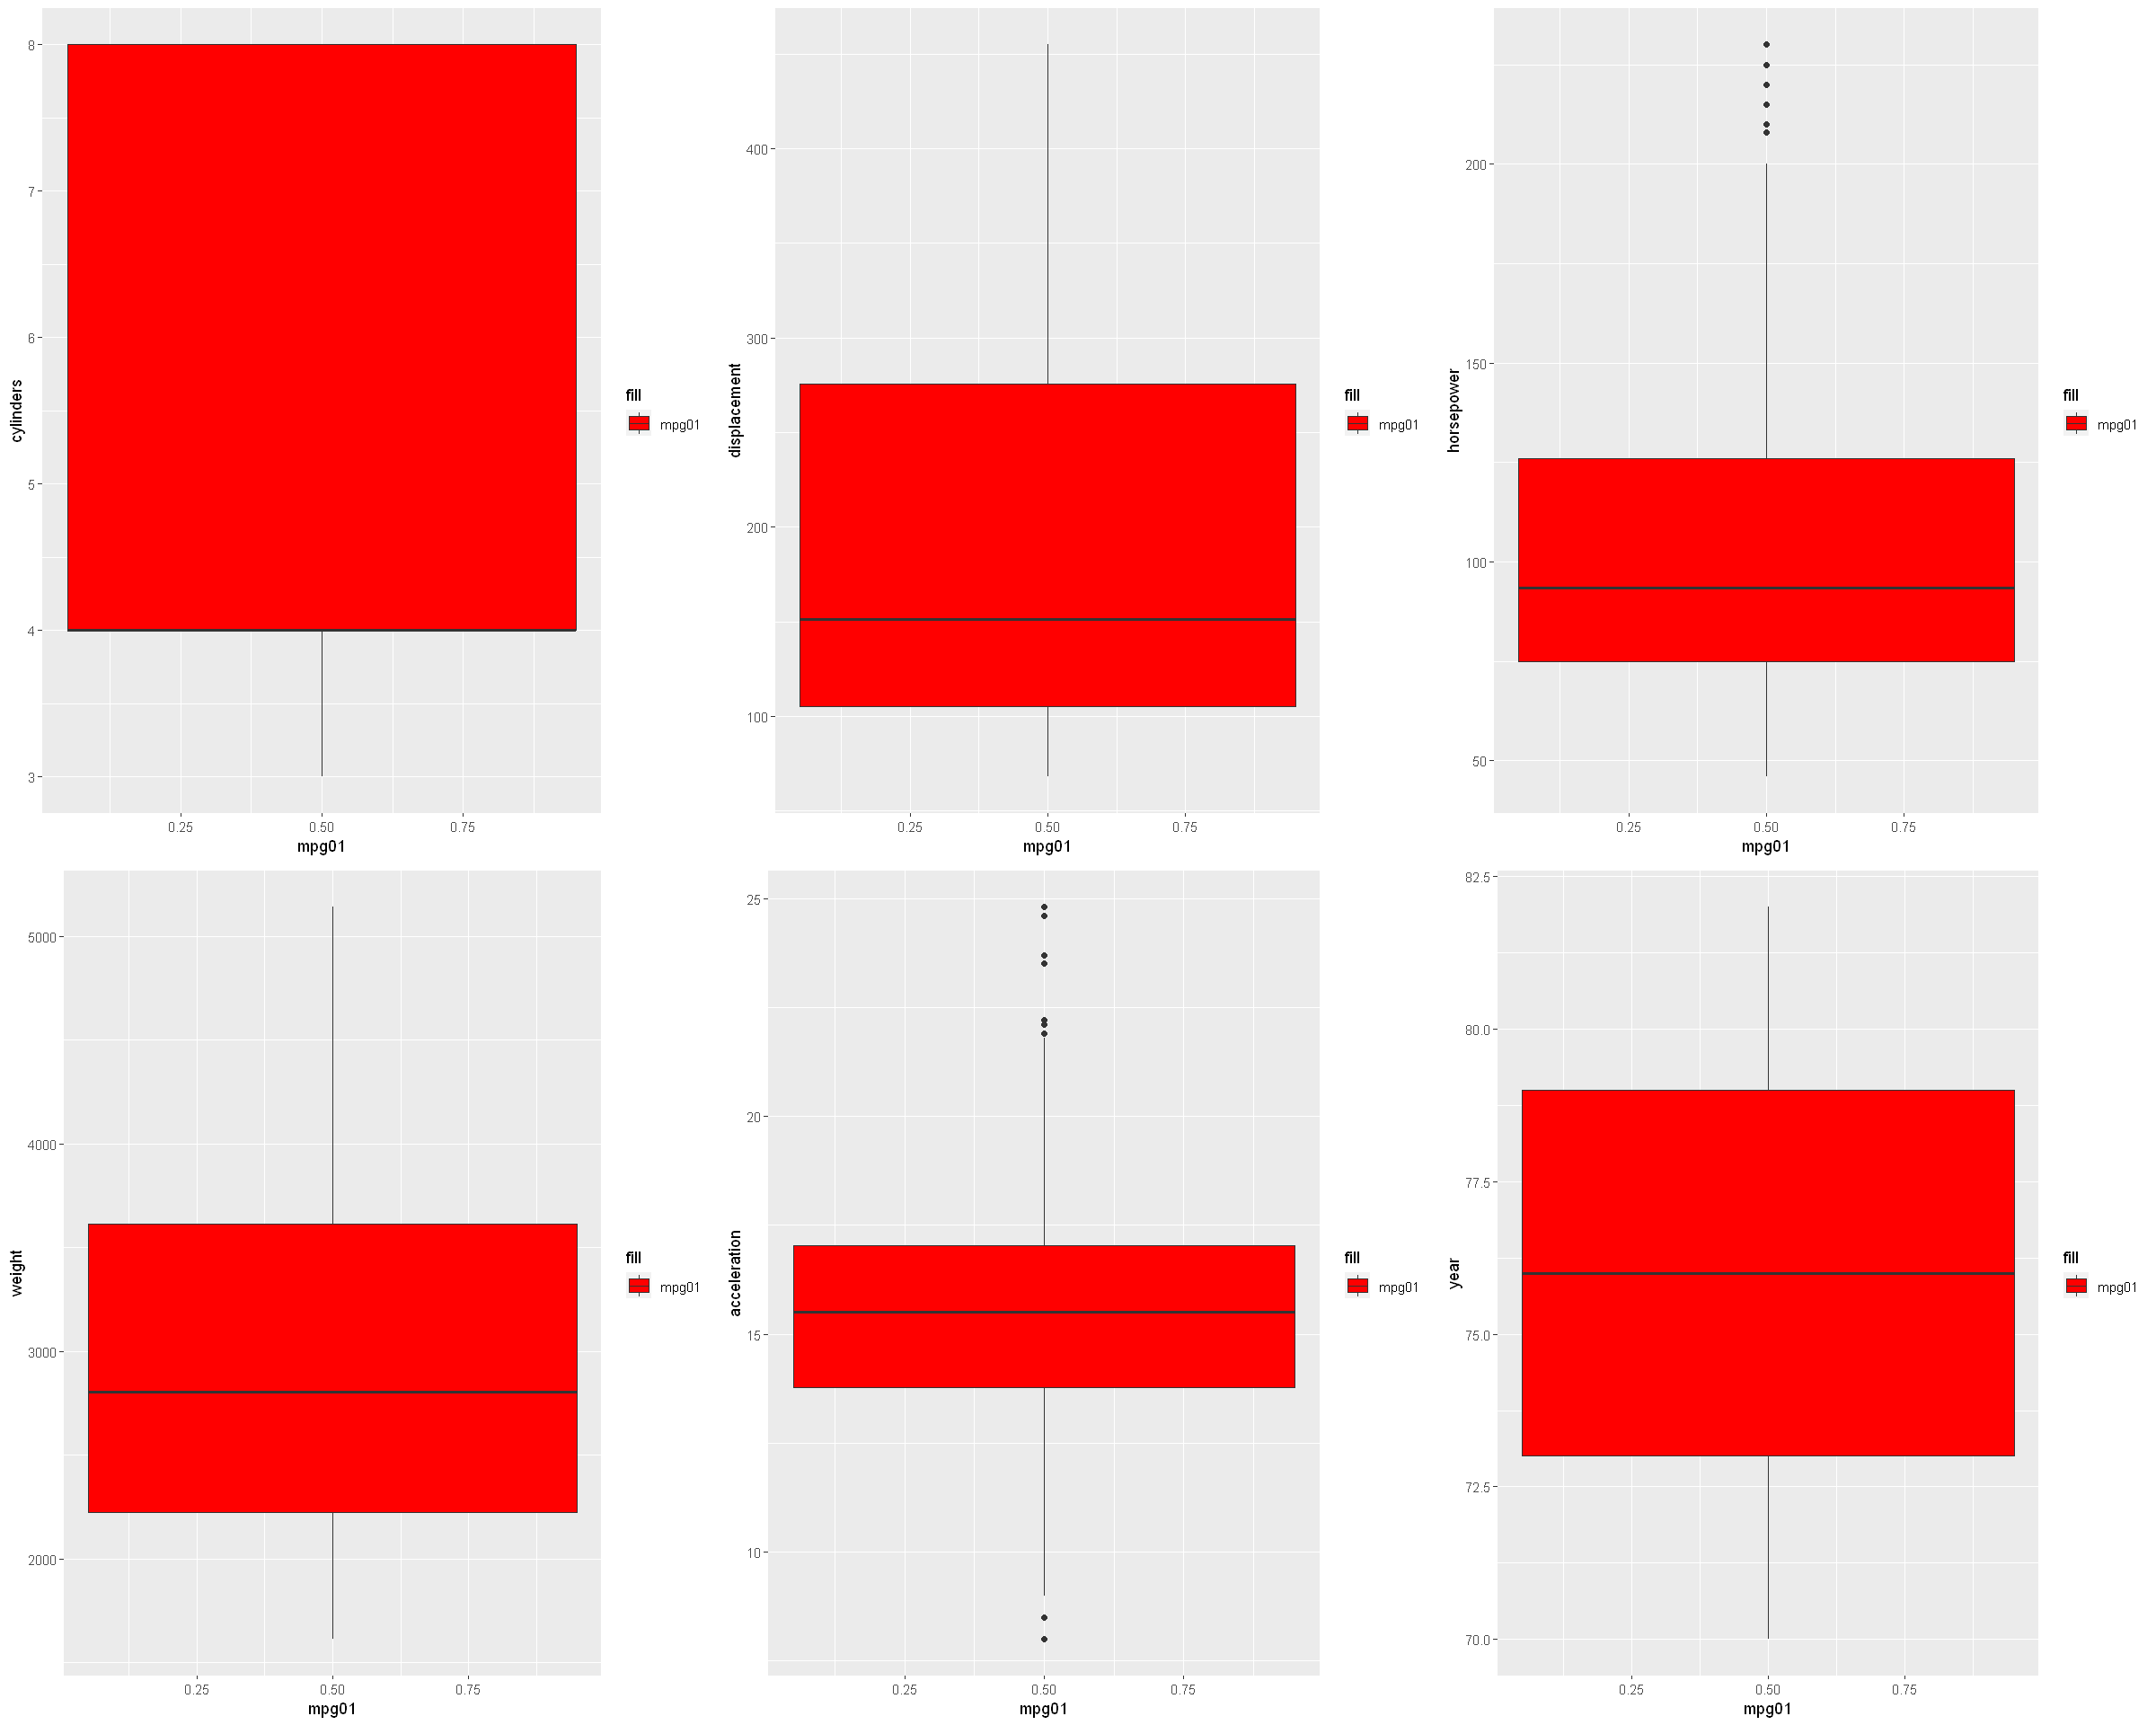

In [43]:
# Visualize the data
options(repr.plot.width=20, repr.plot.height=16)

p1 <- ggplot(Auto[, c('cylinders','displacement','horsepower','weight','acceleration','year', 'mpg01')], aes(x=mpg01, y=cylinders, fill='mpg01',group=1)) +
  geom_boxplot() +
  scale_fill_manual(values = c("red", "green"))
p2 <- ggplot(Auto[, c('cylinders','displacement','horsepower','weight','acceleration','year', 'mpg01')], aes(x=mpg01, y=displacement, fill='mpg01',group=1)) +
  geom_boxplot() +
  scale_fill_manual(values = c("red", "green"))
p3 <- ggplot(Auto[, c('cylinders','displacement','horsepower','weight','acceleration','year', 'mpg01')], aes(x=mpg01, y=horsepower, fill='mpg01',group=1)) +
  geom_boxplot() +
  scale_fill_manual(values = c("red", "green"))
p4 <- ggplot(Auto[, c('cylinders','displacement','horsepower','weight','acceleration','year', 'mpg01')], aes(x=mpg01, y=weight, fill='mpg01',group=1)) +
  geom_boxplot() +
  scale_fill_manual(values = c("red", "green"))
p5 <- ggplot(Auto[, c('cylinders','displacement','horsepower','weight','acceleration','year', 'mpg01')], aes(x=mpg01, y=acceleration, fill='mpg01',group=1)) +
  geom_boxplot() +
  scale_fill_manual(values = c("red", "green"))
p6 <- ggplot(Auto[, c('cylinders','displacement','horsepower','weight','acceleration','year', 'mpg01')], aes(x=mpg01, y=year, fill='mpg01',group=1)) +
  geom_boxplot() +
  scale_fill_manual(values = c("red", "green"))

grid.arrange(p1, p2, p3,p4,p5,p6, nrow=2)

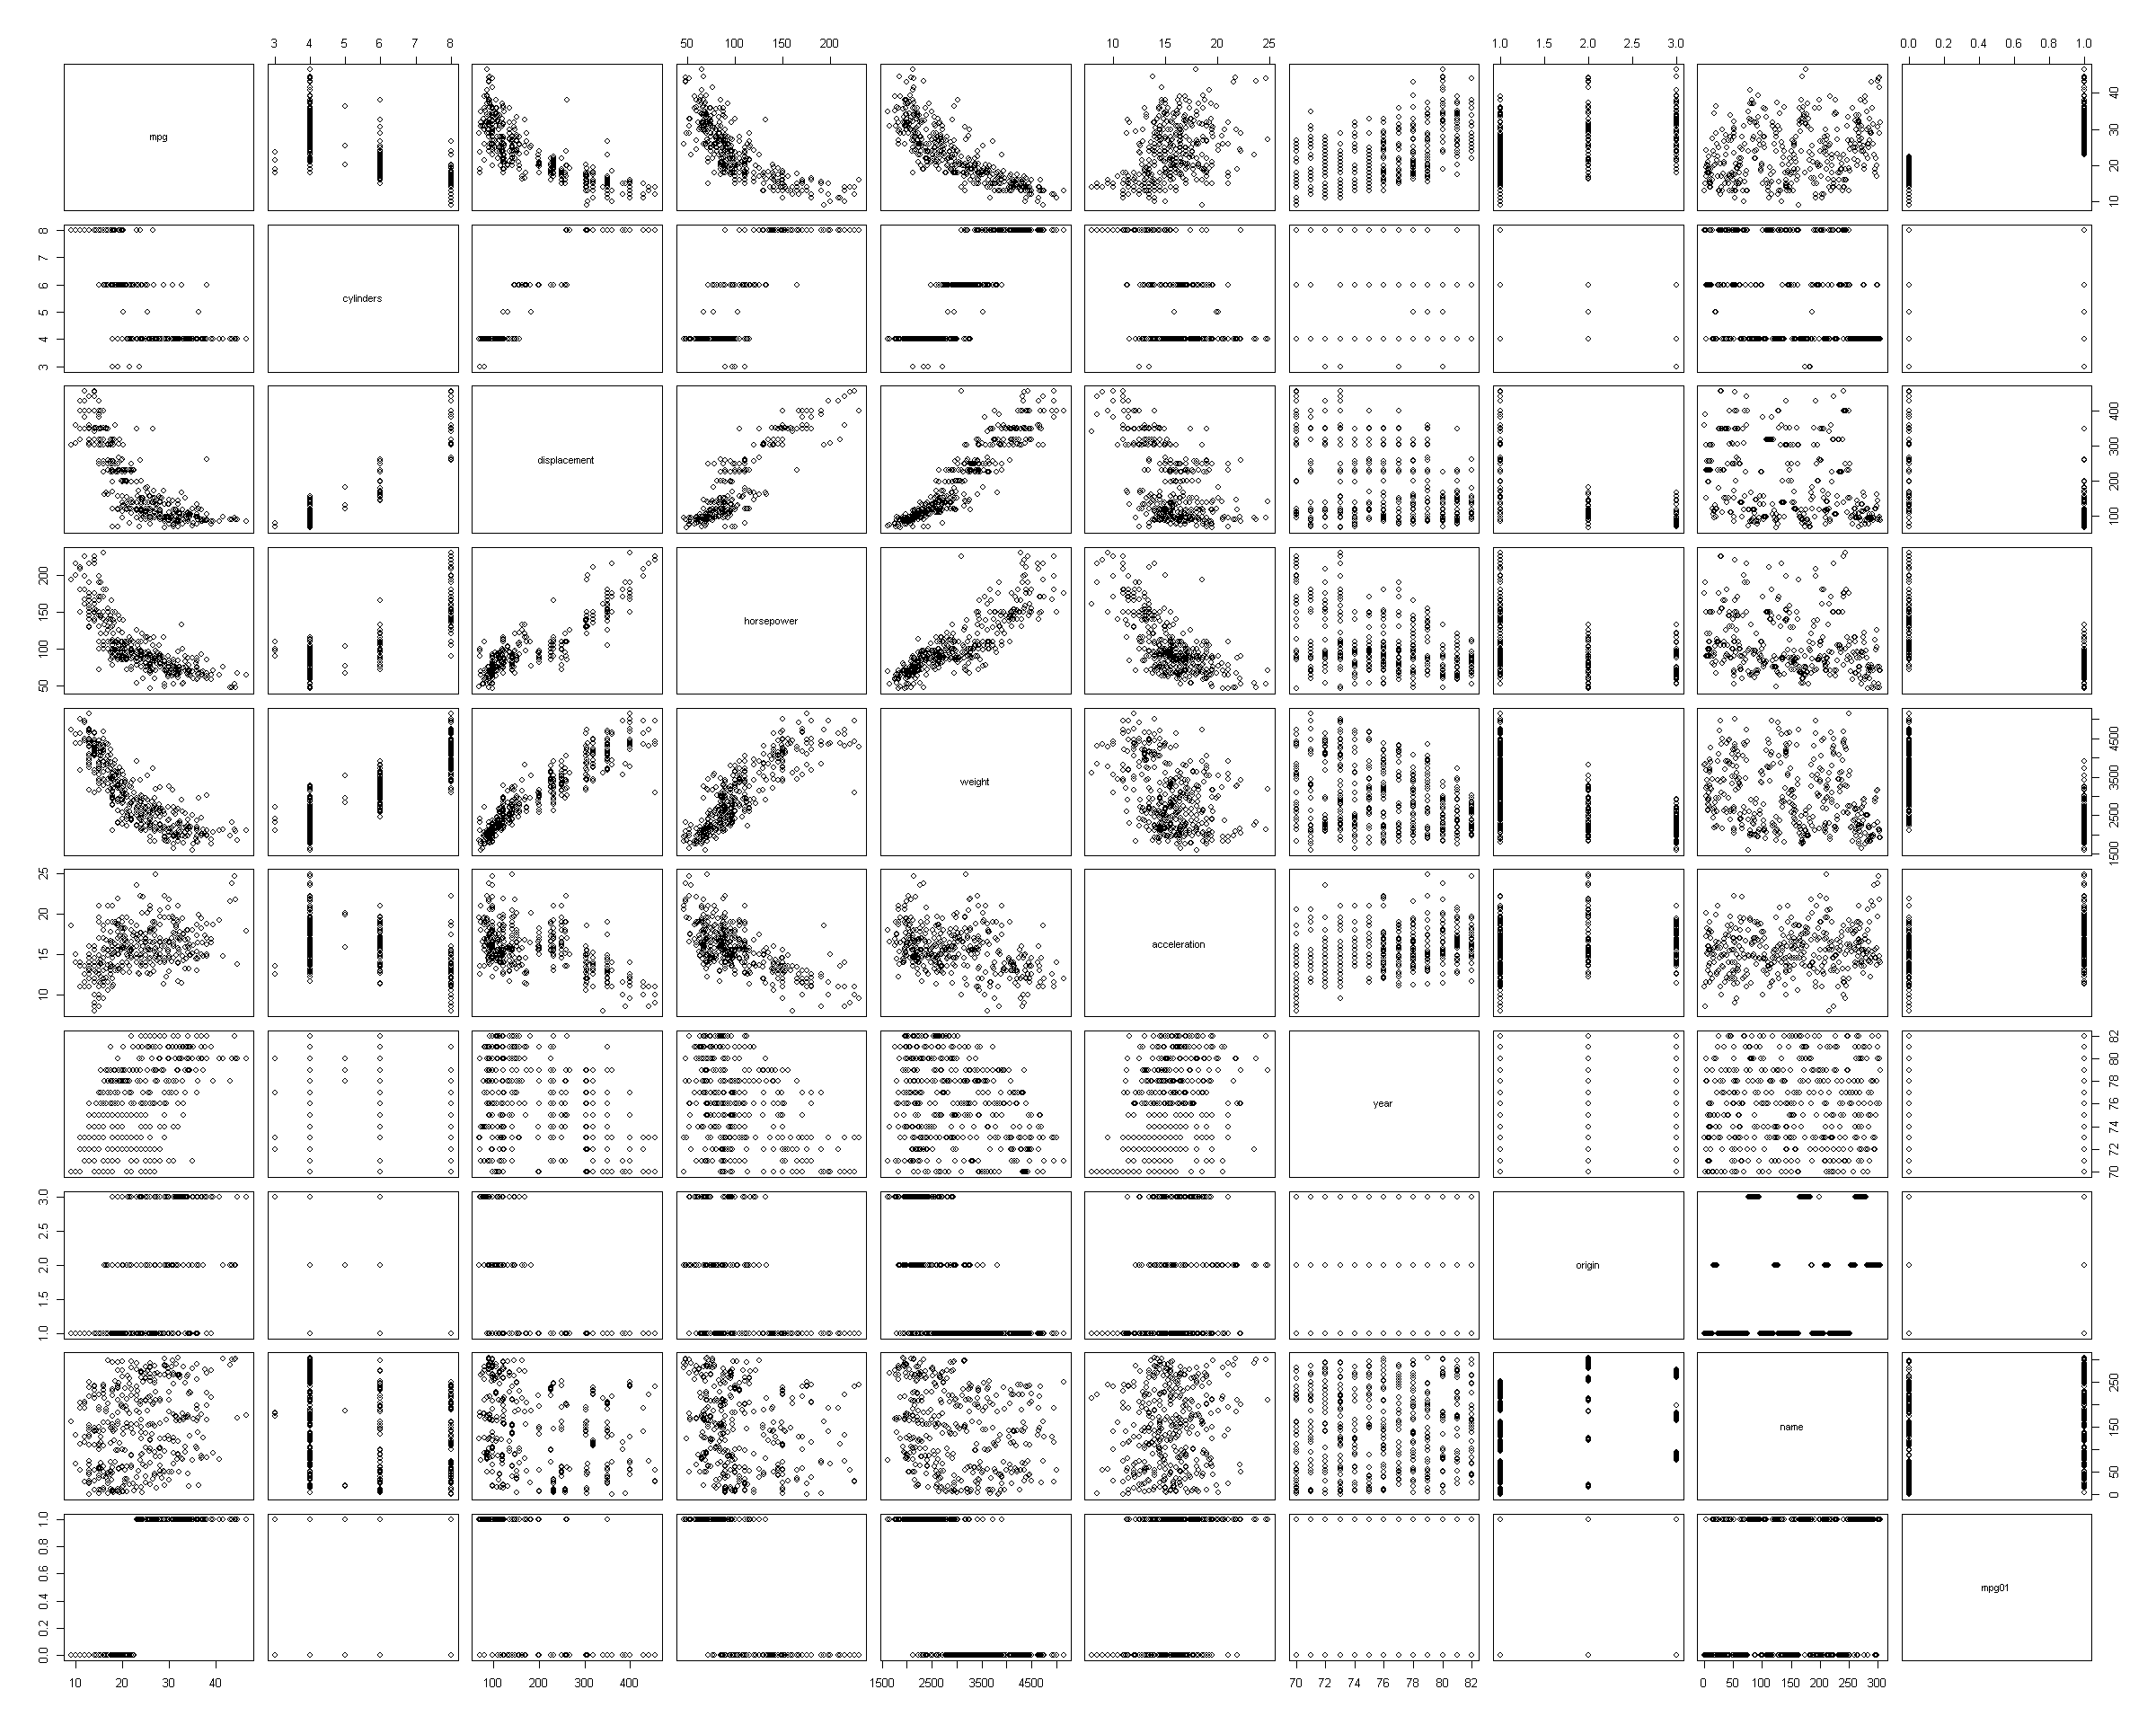

In [44]:
#Pair plots for features
pairs(Auto)

Only Acceleration variable has positive correlation with the response- mpg01.All Other variables have negative correlation with the response .

### Solution : (c)

In [45]:
# Train test spliting
set.seed(123)
train_auto <- createDataPartition(Auto[, 'mpg01'], p=.75, list=FALSE)

# Train dataset
train <- Auto[train_auto, ] #294 observations


# Test dataset
test <- Auto[-train_auto, ] #98 observations


In [46]:
#to get the structure of the dataframe - train
str(train)

'data.frame':	294 obs. of  10 variables:
 $ mpg         : num  18 18 16 17 15 14 14 14 15 14 ...
 $ cylinders   : num  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 318 304 302 429 454 440 455 383 340 ...
 $ horsepower  : num  130 150 150 140 198 220 215 225 170 160 ...
 $ weight      : num  3504 3436 3433 3449 4341 ...
 $ acceleration: num  12 11 12 10.5 10 9 8.5 10 10 8 ...
 $ year        : num  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 231 14 161 141 54 223 241 101 215 ...
 $ mpg01       : num  0 0 0 0 0 0 0 0 0 0 ...


In [47]:
#to get the structure of the dataframe - test
str(test)

'data.frame':	98 obs. of  10 variables:
 $ mpg         : num  15 15 24 22 21 10 14 14 13 28 ...
 $ cylinders   : num  8 8 4 6 6 8 8 8 8 4 ...
 $ displacement: num  350 390 113 198 199 360 350 400 400 116 ...
 $ horsepower  : num  165 190 95 95 90 215 165 175 170 90 ...
 $ weight      : num  3693 3850 2372 2833 2648 ...
 $ acceleration: num  11.5 8.5 15 15.5 15 14 12 11.5 12 14 ...
 $ year        : num  70 70 70 70 70 70 71 71 71 71 ...
 $ origin      : num  1 1 3 1 1 1 1 1 1 2 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 36 2 274 220 7 133 54 242 129 208 ...
 $ mpg01       : num  0 0 1 0 0 0 0 0 0 1 ...


### Solution : (d)

### LDA

In [48]:
# Fit the LDA model with the predictors 
library(MASS)
auto_lda <- lda(mpg01 ~ cylinders + displacement + horsepower + weight, data=train)
auto_lda

Call:
lda(mpg01 ~ cylinders + displacement + horsepower + weight, data = train)

Prior probabilities of groups:
  0   1 
0.5 0.5 

Group means:
  cylinders displacement horsepower   weight
0  6.795918     273.8571  129.97959 3598.293
1  4.231293     117.6701   79.15646 2346.401

Coefficients of linear discriminants:
                       LD1
cylinders    -0.4744589444
displacement -0.0023944306
horsepower    0.0045830050
weight       -0.0008655587

In [49]:
# Predict and evaluate on test data
lda_pred <- predict(auto_lda, newdata=test)
head(lda_pred$class)
head(lda_pred$posterior)

# Confusion matrix
print('Confusion matrix:')
table(lda_pred$class, test$mpg01)

# Accuracy
acc <- mean(lda_pred$class == test$mpg01)
print(paste('Accuracy =', round(acc, 2), '%'))

[1] 0 0 1 0 0 0
Levels: 0 1

,0,1
2,0.99032534,0.009674663
10,0.99271340,0.007286604
15,0.03233468,0.967665318
16,0.59606255,0.403937451
25,0.51497846,0.485021543
26,0.99770771,0.002292285


[1] "Confusion matrix:"


   
     0  1
  0 41  1
  1  8 48

[1] "Accuracy = 0.91 %"


In [50]:
# test error rate
err_rate <- 1-acc
print(paste('Error =', round(err_rate, 4), '%'))

[1] "Error = 0.0918 %"


The test error rate of the LDA model is  9.18%

### Solution : (e)

### QDA

In [51]:
# Fit the LDA model with the predictors 
library(MASS)
auto_qda <- qda(mpg01 ~ cylinders + displacement + horsepower + weight, data=train)
auto_qda

Call:
qda(mpg01 ~ cylinders + displacement + horsepower + weight, data = train)

Prior probabilities of groups:
  0   1 
0.5 0.5 

Group means:
  cylinders displacement horsepower   weight
0  6.795918     273.8571  129.97959 3598.293
1  4.231293     117.6701   79.15646 2346.401

In [52]:
# Predict and evaluate on test data
qda_pred <- predict(auto_qda, newdata=test)
head(qda_pred$class)
head(qda_pred$posterior)

# Confusion matrix
print('Confusion matrix:')
table(qda_pred$class, test$mpg01)

# Accuracy
acc <- mean(qda_pred$class == test$mpg01)
print(paste('Accuracy =', round(acc, 2), '%'))

[1] 0 0 1 1 0 0
Levels: 0 1

,0,1
2,1.00000000,7.386071e-10
10,1.00000000,8.171550e-16
15,0.01768356,9.823164e-01
16,0.46875505,5.312450e-01
25,0.53538690,4.646131e-01
26,1.00000000,4.634134e-15


[1] "Confusion matrix:"


   
     0  1
  0 41  1
  1  8 48

[1] "Accuracy = 0.91 %"


In [53]:
# test error rate
err_rate <- 1-acc
print(paste('Error =', round(err_rate, 4), '%'))

[1] "Error = 0.0918 %"


The test error rate of the QDA model is same as LDA i.e 9.18%

### Solution : (f)

### Logistic Regression

In [54]:
# Fit Logistic Regression model
auto_logreg <- glm(mpg01 ~ cylinders + displacement + horsepower + weight, data=train, family=binomial)
summary(auto_logreg)


Call:
glm(formula = mpg01 ~ cylinders + displacement + horsepower + 
    weight, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1404  -0.2188   0.0472   0.3651   3.3339  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  11.2868930  1.9161918   5.890 3.86e-09 ***
cylinders     0.1171627  0.3868577   0.303  0.76200    
displacement -0.0152855  0.0090478  -1.689  0.09114 .  
horsepower   -0.0443108  0.0153856  -2.880  0.00398 ** 
weight       -0.0017664  0.0007921  -2.230  0.02574 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 407.57  on 293  degrees of freedom
Residual deviance: 160.12  on 289  degrees of freedom
AIC: 170.12

Number of Fisher Scoring iterations: 7


In [55]:
#Make predictions
pred_test_prob <- predict(auto_logreg, newdata=test, type='response')
head(pred_test_prob)

2           10           15           16           25           26 
9.477737e-04 1.288198e-04 8.360030e-01 4.377041e-01 5.701767e-01 1.742672e-05

In [56]:
# Compute the confusion matrix
threshold <- 0.5  # Decision threshold
auto_pred <- rep(0, length(pred_test_prob))
auto_pred[pred_test_prob > threshold] <- 1

# Confusion matrix
print('Confusion matrix:')
table(auto_pred, test$mpg01)

[1] "Confusion matrix:"


         
auto_pred  0  1
        0 42  2
        1  7 47

In [57]:
# Accuracy
acc <- mean(auto_pred == test$mpg01)
print(paste('Accuracy =', round(acc, 2), '%'))

[1] "Accuracy = 0.91 %"


In [58]:
# test error rate
err_rate <- 1-acc
print(paste('Error =', round(err_rate, 4), '%'))

[1] "Error = 0.0918 %"


The test error rate of the Logreg model is same as LDA and QDA i.e 9.18%

### Solution : (g)

### KNN

### Trying with different K values (K =1,3,5,7....)

In [59]:
# Fit the KNN model with the predictors
library(class)

# k = 1
set.seed(123)
knn1_pred <- knn(train=train[, c('cylinders','displacement','horsepower','weight')],
                 test=test[, c('cylinders','displacement','horsepower','weight')],
                 cl=train$mpg01,
                 k=1)

# Confusion matrix
print('Confusion matrix:')
table(knn1_pred, test$mpg01)

# Accuracy
acc <- mean(knn1_pred == test$mpg01)
print(paste('Accuracy =', round(acc, 2), '%'))

# test error rate
err_rate <- 1-acc
print(paste('Error =', round(err_rate, 4), '%'))

[1] "Confusion matrix:"


         
knn1_pred  0  1
        0 41  6
        1  8 43

[1] "Accuracy = 0.86 %"
[1] "Error = 0.1429 %"


In [60]:
# Fit the KNN model with the predictors
library(class)

# k = 3
set.seed(123)
knn1_pred <- knn(train=train[, c('cylinders','displacement','horsepower','weight')],
                 test=test[, c('cylinders','displacement','horsepower','weight')],
                 cl=train$mpg01,
                 k=3)

# Confusion matrix
print('Confusion matrix:')
table(knn1_pred, test$mpg01)

# Accuracy
acc <- mean(knn1_pred == test$mpg01)
print(paste('Accuracy =', round(acc, 2), '%'))

# test error rate
err_rate <- 1-acc
print(paste('Error =', round(err_rate, 4), '%'))

[1] "Confusion matrix:"


         
knn1_pred  0  1
        0 41  5
        1  8 44

[1] "Accuracy = 0.87 %"
[1] "Error = 0.1327 %"


In [61]:
# Fit the KNN model with the predictors
library(class)

# k = 5
set.seed(123)
knn1_pred <- knn(train=train[, c('cylinders','displacement','horsepower','weight')],
                 test=test[, c('cylinders','displacement','horsepower','weight')],
                 cl=train$mpg01,
                 k=5)

# Confusion matrix
print('Confusion matrix:')
table(knn1_pred, test$mpg01)

# Accuracy
acc <- mean(knn1_pred == test$mpg01)
print(paste('Accuracy =', round(acc, 2), '%'))

# test error rate
err_rate <- 1-acc
print(paste('Error =', round(err_rate, 4), '%'))

[1] "Confusion matrix:"


         
knn1_pred  0  1
        0 42  6
        1  7 43

[1] "Accuracy = 0.87 %"
[1] "Error = 0.1327 %"


In [62]:
# Fit the KNN model with the predictors
library(class)

# k = 7
set.seed(123)
knn1_pred <- knn(train=train[, c('cylinders','displacement','horsepower','weight')],
                 test=test[, c('cylinders','displacement','horsepower','weight')],
                 cl=train$mpg01,
                 k=7)

# Confusion matrix
print('Confusion matrix:')
table(knn1_pred, test$mpg01)

# Accuracy
acc <- mean(knn1_pred == test$mpg01)
print(paste('Accuracy =', round(acc, 2), '%'))

# test error rate
err_rate <- 1-acc
print(paste('Error =', round(err_rate, 4), '%'))

[1] "Confusion matrix:"


         
knn1_pred  0  1
        0 43  5
        1  6 44

[1] "Accuracy = 0.89 %"
[1] "Error = 0.1122 %"


In [63]:
# Fit the KNN model with the predictors
library(class)

# k = 9
set.seed(123)
knn1_pred <- knn(train=train[, c('cylinders','displacement','horsepower','weight')],
                 test=test[, c('cylinders','displacement','horsepower','weight')],
                 cl=train$mpg01,
                 k=9)

# Confusion matrix
print('Confusion matrix:')
table(knn1_pred, test$mpg01)

# Accuracy
acc <- mean(knn1_pred == test$mpg01)
print(paste('Accuracy =', round(acc, 2), '%'))

# test error rate
err_rate <- 1-acc
print(paste('Error =', round(err_rate, 4), '%'))

[1] "Confusion matrix:"


         
knn1_pred  0  1
        0 43  1
        1  6 48

[1] "Accuracy = 0.93 %"
[1] "Error = 0.0714 %"


K value = 9 seems to perform the best on this data set with lowest werror rate of 7.1%